In [67]:
import zipfile
import os

In [68]:
!wget --no-check-certificate \
    "https://github.com/TanviKandalla/recommendersys/archive/refs/heads/main.zip" \
            -O "/tmp/genres.zip"


zip_ref = zipfile.ZipFile('/tmp/genres.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

--2022-05-29 10:18:47--  https://github.com/TanviKandalla/recommendersys/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/TanviKandalla/recommendersys/zip/refs/heads/main [following]
--2022-05-29 10:18:47--  https://codeload.github.com/TanviKandalla/recommendersys/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/genres.zip’

/tmp/genres.zip         [  <=>               ]   3.01M  14.9MB/s    in 0.2s    

2022-05-29 10:18:48 (14.9 MB/s) - ‘/tmp/genres.zip’ saved [3158443]



In [69]:
!unzip /tmp/recommendersys-main/genres_v2.csv.zip

Archive:  /tmp/recommendersys-main/genres_v2.csv.zip
replace genres_v2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: genres_v2.csv           


In [70]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [71]:
df = pd.read_csv("genres_v2.csv")

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [73]:
df = df.drop(columns = ["title","Unnamed: 0","song_name","track_href","uri","type"])

In [74]:
gen = pd.value_counts(df.genre)
gen

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

In [75]:
df['genre_numeric'] = df['genre'].map({'Underground Rap':0,'Dark Trap':1, 'Hiphop':2, 'trance':3, 'trap':4, 'techhouse':5, 'dnb':6,'psytrance':7, 'techno':8, 'hardstyle':9,'RnB':10, 'Trap Metal':11, 'Rap':12, 'Emo':13, 'Pop':14})

In [76]:
df = df.drop(["genre","id","analysis_url"],axis = 1)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  duration_ms       42305 non-null  int64  
 12  time_signature    42305 non-null  int64  
 13  genre_numeric     42305 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 4.5 MB


In [78]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters = 10)

k.fit(df)

KMeans(n_clusters=10)

In [79]:
k.labels_

array([2, 0, 2, ..., 0, 4, 3], dtype=int32)

In [80]:
import matplotlib.pyplot as plt

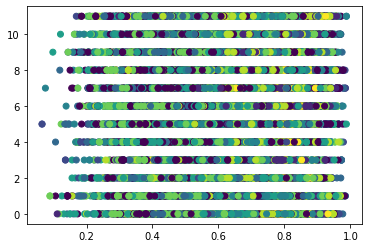

In [82]:
plt.scatter(df.iloc[:,0],df.iloc[:,2], c=k.labels_)